In [116]:
# Nearest Neighbors 
'''
- It's a non-generalizing learning model
- Useful when decision boundry is irregular
- Stores all the data in a structure like Ball Tree or KD Tree
- For unsupervised NN, return the shortest Euclidean distance between configured K
- Euclidean distance is calcuated as the square root of the sum of the squared differneces between a new point (x) and an existing point (xi) across all input
'''

"\n- It's a non-generalizing learning model\n- Useful when decision boundry is irregular\n- Stores all the data in a structure like Ball Tree or KD Tree\n- For unsupervised NN, return the shortest Euclidean distance between configured K\n- Euclidean distance is calcuated as the square root of the sum of the squared differneces between a new point (x) and an existing point (xi) across all input\n"

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
%matplotlib inline

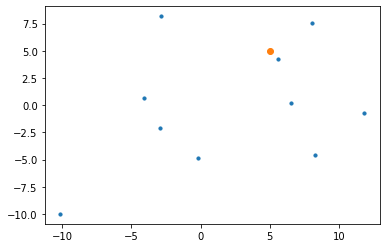

In [118]:
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree')
X, y = make_blobs(n_features=2 , n_samples=10, cluster_std=5)

plt.scatter(X[:,0], X[:,1], s=10, alpha=1)
plt.scatter([5],[5]) 

In [119]:
nn.fit(X)

NearestNeighbors(algorithm='ball_tree', n_neighbors=2)

In [120]:
_, X_nearest = nn.kneighbors([[5,5]])
nearest = X[X_nearest]
nearest

array([[[5.61089678, 4.20296834],
        [8.03976982, 7.57086771]]])

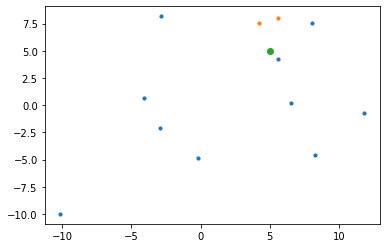

In [121]:
plt.scatter(X[:,0], X[:,1], s=10, alpha=1)
plt.scatter(nearest[:,0],nearest[:,1], s=10, cmap='virdis')
plt.scatter([5], [5]) 

In [122]:
# Nearest Neighbors for Classification
'''
- A query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
- Two types of nearest neighbor classifier
  - KNeighboursClassifier ( based on configured k )
  - RadiusNeighbourClassifier ( based on configured r )
- Weights can be ‘uniform’ or ‘distance’. It assigns weights proportional to the inverse of the distance from the query point.
'''

'\n- A query point is assigned the data class which has the most representatives within the nearest neighbors of the point.\n- Two types of nearest neighbor classifier\n  - KNeighboursClassifier ( based on configured k )\n  - RadiusNeighbourClassifier ( based on configured r )\n- Weights can be ‘uniform’ or ‘distance’. It assigns weights proportional to the inverse of the distance from the query point.\n'

In [123]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

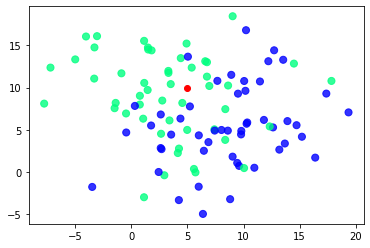

In [124]:
knc = KNeighborsClassifier(n_neighbors=10)
rnc = RadiusNeighborsClassifier(radius=10)

X,Y = make_blobs(n_features=2, n_samples=100, cluster_std=5, centers=2)

plt.scatter(X[:,0], X[:,1], s=50, alpha=.8, c=Y, cmap='winter')
plt.scatter([5],[10],c='r')

In [125]:
knc.fit(X,Y)
rnc.fit(X,Y)

RadiusNeighborsClassifier(radius=10)

In [126]:
_, knc_neighbors = knc.kneighbors([[5,-5]])
__, rnc_neighbors = rnc.radius_neighbors([[5,-5]])

print(knc_neighbors[0])
print(rnc_neighbors[0])

[ 2 27 46 48 69 24 64  8 93 28]
[97 69 65 64 93 21 59 27 28 30 91 51 24  8 46 71 83  2 56 20 15 48 60  5
 50 19]


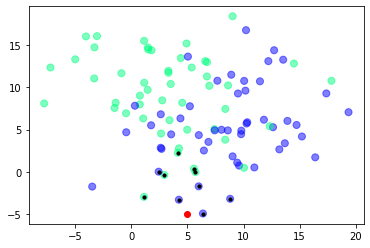

In [127]:
# KNN
nearest = X[knc_neighbors[0]]
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')

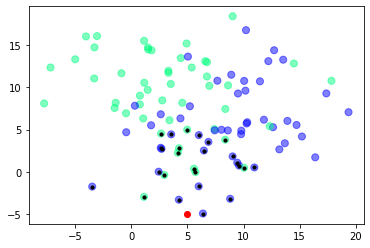

In [128]:
# RNN
nearest = X[rnc_neighbors[0]]
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')

In [129]:
'''
Simple Linear Regression
- Has only one X and one Y variable
- Square feet prediction
- SLR =>  y= b0 + b1*X1

Multiple Linear Regression
- Has one Y variable, but two or more X variables
- MLR is used to estimate the relationship between two or more independent variables and one dependent variable
  - Ex: planning an d control, prediction or forecasting
- MLR =>  y = b0 + b1*X1 + b2*X2 + ... + bn*Xn
'''

'\nSimple Linear Regression\n- Has only one X and one Y variable\n- Square feet prediction\n- SLR =>  y= b0 + b1*X1\n\nMultiple Linear Regression\n- Has one Y variable, but two or more X variables\n- MLR is used to estimate the relationship between two or more independent variables and one dependent variable\n  - Ex: planning an d control, prediction or forecasting\n- MLR =>  y = b0 + b1*X1 + b2*X2 + ... + bn*Xn\n'

In [130]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

url = 'https://raw.githubusercontent.com/ywchiu/riii/master/data/house-prices.csv'
data = pd.read_csv(url, error_bad_lines=False)
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [131]:
data.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [132]:
# sns.pairplot(data)

In [144]:
X = data[['SqFt', 'Bedrooms', 'Bathrooms']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100)

In [145]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [146]:
coeff = pd.DataFrame(lr.coef_,X.columns, columns=['coefficient'])
coeff

,coefficient
SqFt,18.564189
Bedrooms,16476.196830
Bathrooms,21301.946957


Coefficients: 
 [1.85641894e+01 1.64761968e+04 2.13019470e+04]
Mean squared error: 495119525.88
Variance score: 0.29


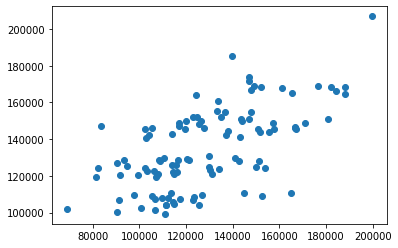

In [147]:
prediction = lr.predict(X_test)
plt.scatter(y_test, prediction)

print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((lr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(X_test, y_test))